# Exploratory Data Analysis in Action - EDA: Powerplants

Powerplant questions:
- Q1: How many power plants are located in Europe?
- Q2: Which European countries have the most power plants?
- Q3: Which country in the world has the most/the least power plants?
- Q4: Inspect the regional distribution of individual fuels in Germany
- Q5: Take a look at the United States of America. Inspect what types of powerplants have been constructed at what time
- Q6: Which Countries have the highes percentage of green powerplants?

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import sys
sys.path.append("../src/")

from helper import cuteplot
from helper import minmax_scaler
plt.rcParams["figure.figsize"] = [22,10]
import seaborn

In [38]:
import pickle
gdf_world = pickle.load(open( "../data/gdf_world.p", "rb" ))
gdf_europe = pickle.load(open( "../data/gdf_europe.p", "rb" ))
gdf_germany = pickle.load(open( "../data/gdf_germany.p", "rb" ))

In [39]:
# einen Überblick kriegen
pp = pd.read_csv("../data/powerplants.csv")

# Sample des Dataframes

pp.sample()
gdf_europe

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,green,continent,geometry
9,ALB,Albania,Bistrica 1,27.0,39.9116,20.1047,Hydro,1965,NaN,GEODB,88.45,True,Europe,POINT (20.10470 39.91160)
10,ALB,Albania,Fierza,500.0,42.2514,20.0431,Hydro,1978,NaN,GEODB,1648.24,True,Europe,POINT (20.04310 42.25140)
11,ALB,Albania,Koman,600.0,42.1033,19.8224,Hydro,1985,NaN,GEODB,1982.72,True,Europe,POINT (19.82240 42.10330)
12,ALB,Albania,Lanabregas,5.0,41.3428,19.8964,Hydro,1951,NaN,GEODB,15.23,True,Europe,POINT (19.89640 41.34280)
13,ALB,Albania,Shkopet,24.0,41.6796,19.8305,Hydro,1963,NaN,GEODB,83.57,True,Europe,POINT (19.83050 41.67960)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,GBR,United Kingdom,Yelvertoft,16.4,52.3748,-1.1511,Wind,-1,Greencoat UK Wind,UK Renewable Energy Planning Database,41.34,True,Europe,POINT (-1.15110 52.37480)
23593,GBR,United Kingdom,Yerbeston Gate Farm,6.1,51.7473,-4.7945,Solar,-1,Sunsave 23 Limited/ Vogt solar,UK Renewable Energy Planning Database,9.36,True,Europe,POINT (-4.79450 51.74730)
23594,GBR,United Kingdom,Yonderton Wind Cluster,4.6,57.5870,-2.4166,Wind,-1,Wilson Strachan,UK Renewable Energy Planning Database,11.59,True,Europe,POINT (-2.41660 57.58700)
23595,GBR,United Kingdom,Yorkley Solar Park,5.0,51.7459,-2.5356,Solar,-1,Bee Green Solar,UK Renewable Energy Planning Database,7.61,True,Europe,POINT (-2.53560 51.74590)


> **Q1: How many power plants are located in Europe?**

In [40]:
gdf_europe.shape[0]

9969

> **Q2: Which European countries have the most power plants?**

country
United Kingdom    2582
France            2063
Germany           1292
Spain              791
Czech Republic     462
Name: count, dtype: int64


<Axes: xlabel='country'>

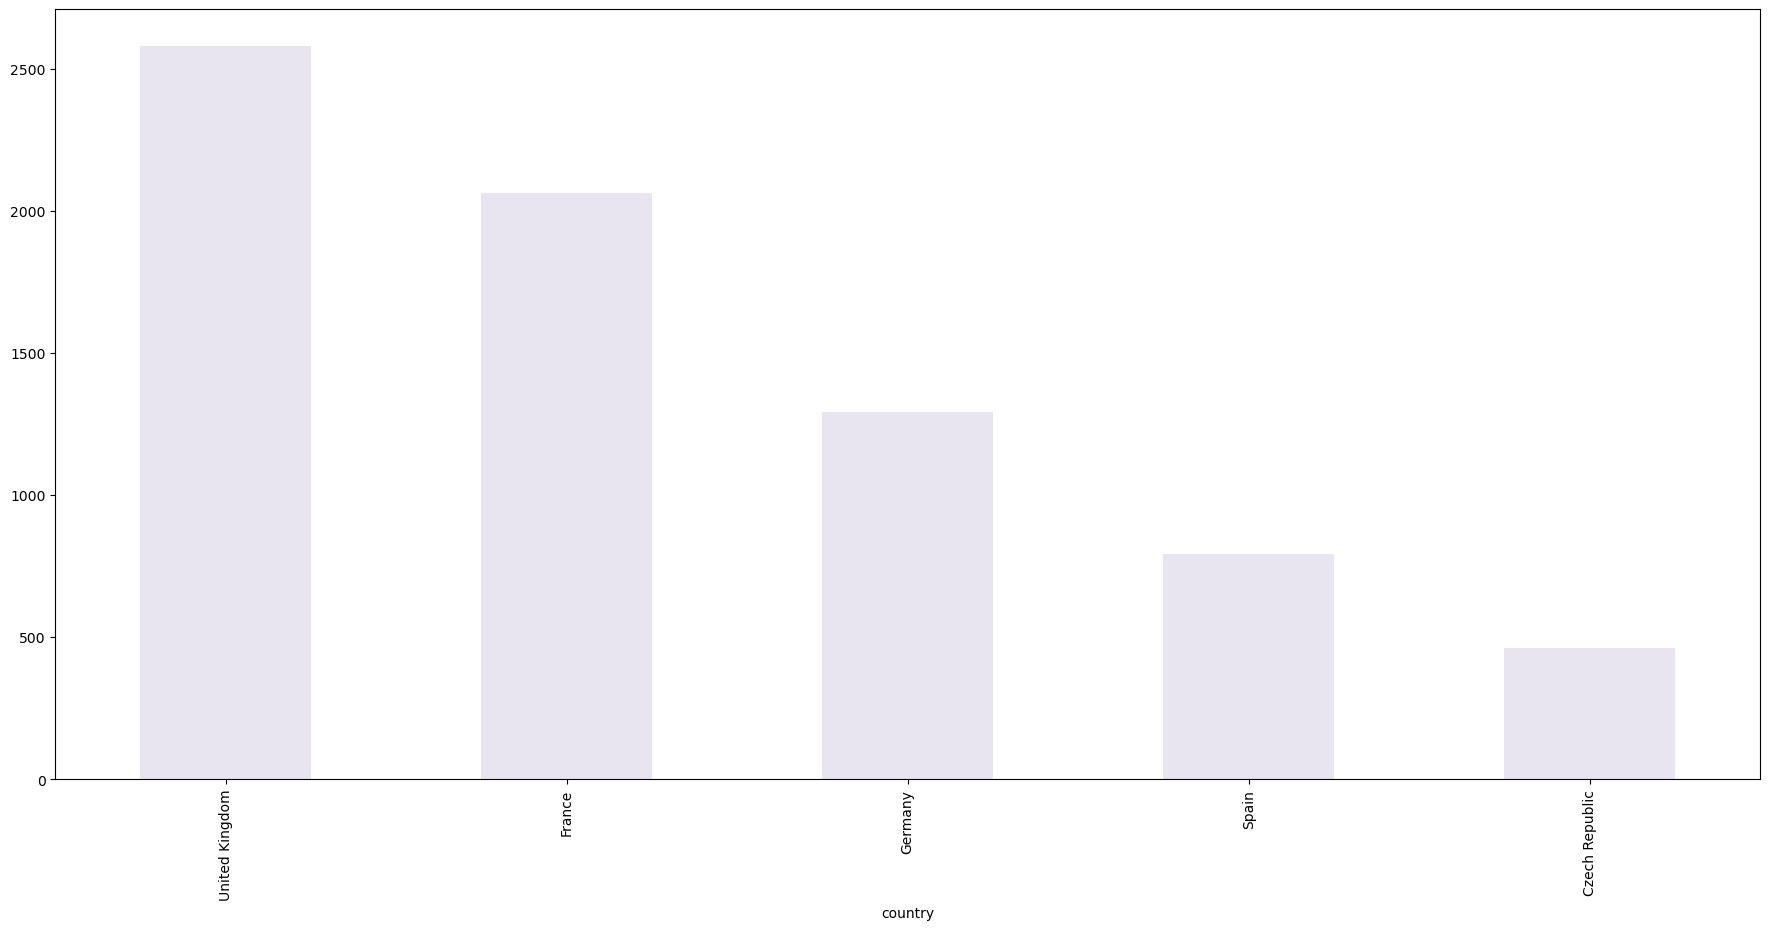

In [44]:
# Top 5 Länder mit den meisten Kraftwerken
print(gdf_europe['country'].value_counts().head())


import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap

colors = sns.set_palette("PuBu")  # Farben für die Segmente



#grafische Darstellung
gdf_europe['country'].value_counts().head().plot.bar()

In [24]:
sns.set_palette("Paired") 

> **Q3: Which country in the world has the most/the least power plants?**

In [45]:
# herausfinden, was die min&max Nummer an Kernkraftwerken ist 

most_pp = gdf_world['country'].value_counts().max()
min_pp = gdf_world['country'].value_counts().min()

# Länder mit dieser Anzahl finden

max_countries = gdf_world['country'].value_counts().loc[gdf_world['country'].value_counts() == most_pp].index.tolist()
min_countries = gdf_world['country'].value_counts().loc[gdf_world['country'].value_counts() == min_pp].index.tolist()

#print
print("Country with most power plants: ", max_countries, "Count: ", most_pp)
print("\nCountries with least power plants: ", min_countries, "Count: ", min_pp)


Country with most power plants:  ['United States of America'] Count:  9692

Countries with least power plants:  ['Suriname', 'Palestine', 'Western Sahara', 'Guinea-Bissau', 'Lesotho', 'Equatorial Guinea'] Count:  1


> **Q4: Inspect the regional distribution of individual fuels in Germany**

> _Note: Some fuels may be distributed differently than expected. Is the dataset or are the state politics to blame?_

> _Hint: you can use `map_extent = (5, 16, 47, 55)` for the `cuteplot()` function to draw a map of germany. You can use the `draw_water=True` keyword in the `cuteplot()` function to draw (the biggest) rivers and lakes._


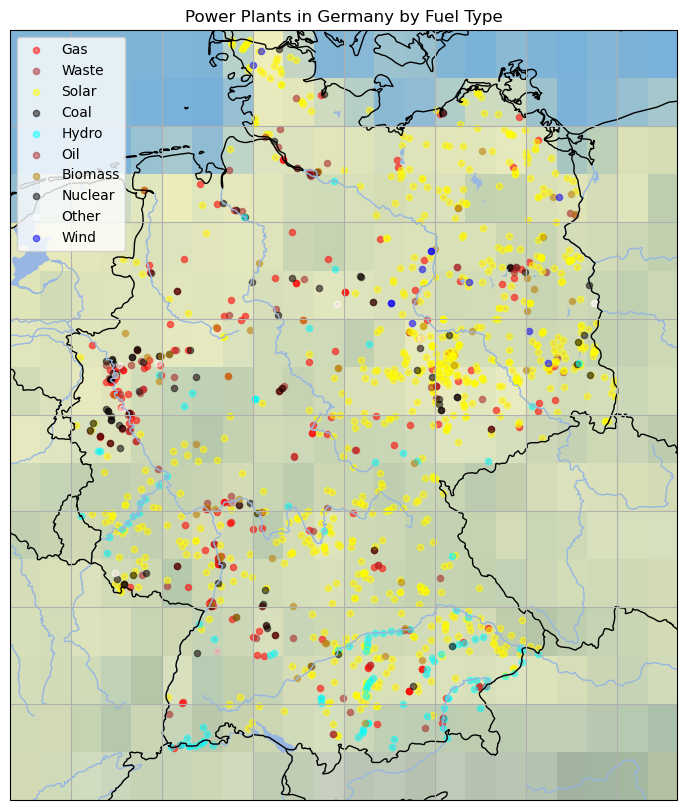

In [52]:
if 'longitude' in gdf_germany.columns and 'latitude' in gdf_germany.columns and 'primary_fuel' in gdf_germany.columns:
    from shapely.geometry import Point

    # Define colors for the power plant types
    colors = {
        "Solar": "yellow",
        "Wind": "blue",
        "Hydro": "aqua",
        "Gas": "red",
        "Biomass": "darkgoldenrod",
        "Waste": "brown",
        "Nuclear": "black",
        "Other": "white",
        "Coal": "black",
        "Oil": "brown"
    }

    # Create geometry column for GeoDataFrame
    geometry = [Point(xy) for xy in zip(gdf_germany['longitude'], gdf_germany['latitude'])]
    gdf_germany = gpd.GeoDataFrame(gdf_germany, geometry=geometry, crs="EPSG:4326")

    # Create base map
    base = cuteplot(gdf_germany, map_extent=(5, 16, 47, 55), draw_water=True)

    # Plot power plants using scatter
    for fuel in gdf_germany['primary_fuel'].unique():
        mask = gdf_germany['primary_fuel'] == fuel
        plt.scatter(
            gdf_germany[mask].geometry.x,
            gdf_germany[mask].geometry.y,
            c=colors.get(fuel, 'grey'),  # Default to grey if fuel not in colors
            s=20,
            alpha=0.5,
            label=fuel
        )

    plt.title('Power Plants in Germany by Fuel Type')
    plt.legend()
    plt.show()
else:
    print("Required columns ('longitude', 'latitude', or 'primary_fuel') not found in gdf_germany.")





> **Q5: Take a look at the United States of America. Inspect what types of powerplants have been constructed at what time**

_Info: Type is meant with regard to the primary fuel._

> _Hint: Consider using `df.groupby()` on multiple columns. You can get rid of the multi-dimensional Index afterwards by using `df.unstack()`._

In [53]:
pp_us = gdf_world.loc[gdf_world['country'] == 'United States of America']

#print(pp_us)

pp_us= pp_us[['primary_fuel', 'start date']]

pp_us = pp_us.loc[pp_us['start date'] != -1]

min_date = pp_us['start date'].min()
max_date = pp_us['start date'].max()

primary_fuels = pp_us['primary_fuel'].unique()

new_fuels_per_year = []

for i in range(min_date, max_date + 1):
    current_years = pp_us.loc[pp_us['start date'] == i]
    
    if current_years.empty:
        continue  # Skip if there's no data for this year
    
    # Calculate the counts for `primary_fuel`
    fuel_counts = current_years['primary_fuel'].value_counts().reset_index()
    fuel_counts.columns = ['primary_fuel', 'count']
    fuel_counts['start date'] = i  
    new_fuels_per_year.append(fuel_counts)

# Combine all data into a single DataFrame
final_df = pd.concat(new_fuels_per_year, ignore_index=True)

# Display the result
print(final_df)

#print(pp_us, min_date, max_date, primary_fuels)


    primary_fuel  count  start date
0          Hydro      1        1896
1          Hydro      1        1899
2          Hydro      1        1900
3          Hydro      1        1901
4          Hydro      1        1902
..           ...    ...         ...
601         Wind     17        2020
602          Gas      6        2020
603      Storage      2        2020
604        Waste      2        2020
605      Biomass      1        2020

[606 rows x 3 columns]


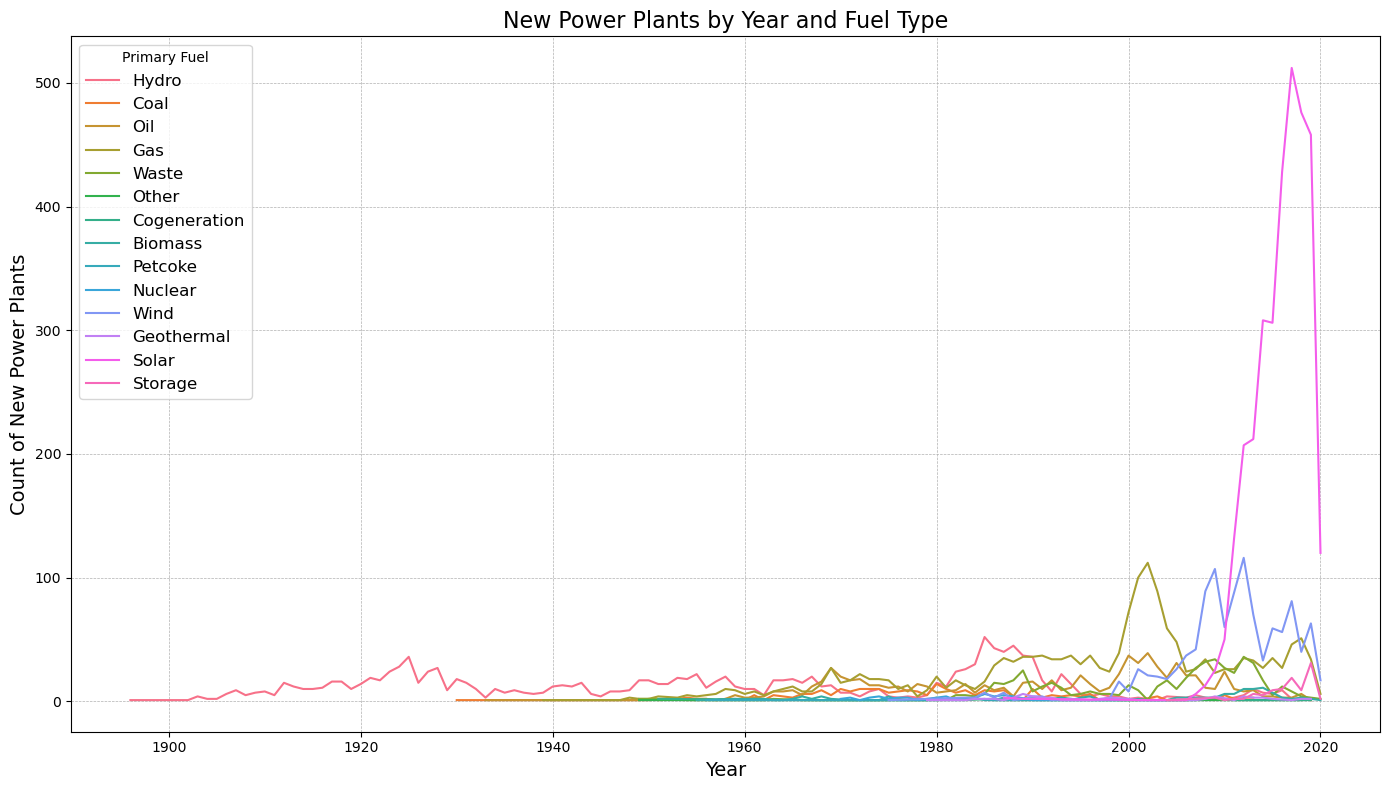

In [9]:
import seaborn as sns

# Create the plot
plt.figure(figsize=(14, 8))


sns.lineplot(
    data=final_df,
    x='start date', 
    y='count', 
    hue='primary_fuel',   #wird hier überschrieben  
)


plt.title('New Power Plants by Year and Fuel Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of New Power Plants', fontsize=14)
plt.legend(title='Primary Fuel', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.ylim(0, 200)
#plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.show()
#? hier mpsste doch auch auf pastell gehen oder nicht

> **Q6: _Come up with your own question_**
> 
> **Which Countries have the highes percentage of green powerplants?**

In [140]:

df = gdf_world['country']
countries = gdf_world['country'].unique()


greenness_dict = {}

# get percentage of green powerplants per country

for country in countries:
    country_count = df.value_counts()[country]
   
    country_rows = gdf_world.loc[gdf_world['country'] == country]

    green_count = country_rows['green'].value_counts().get(True, 0)
    
    greenness_dict[country] = green_count / country_count

In [117]:
# sort by amount of green power plants (highest first)

sorted(greenness_dict.items(), key=lambda x: x[1], reverse = True)

[('Bhutan', 1.0),
 ('Burundi', 1.0),
 ('Equatorial Guinea', 1.0),
 ('Ethiopia', 1.0),
 ('Iceland', 1.0),
 ('Lesotho', 1.0),
 ('Mali', 1.0),
 ('Mozambique', 1.0),
 ('Nepal', 1.0),
 ('Palestine', 1.0),
 ('Paraguay', 1.0),
 ('Suriname', 1.0),
 ('Swaziland', 1.0),
 ('Norway', 0.9897610921501706),
 ('France', 0.9821514712976362),
 ('Switzerland', 0.9761904761904762),
 ('Austria', 0.970873786407767),
 ('Sweden', 0.9556962025316456),
 ('Laos', 0.95),
 ('Czech Republic', 0.9415584415584416),
 ('Uruguay', 0.9411764705882353),
 ('Portugal', 0.9370629370629371),
 ('Canada', 0.9096657633242999),
 ('Uganda', 0.9090909090909091),
 ('Afghanistan', 0.8888888888888888),
 ('Costa Rica', 0.8888888888888888),
 ('Spain', 0.8817610062893082),
 ('New Zealand', 0.8809523809523809),
 ('Albania', 0.875),
 ('El Salvador', 0.875),
 ('Vietnam', 0.8705357142857143),
 ('Democratic Republic of the Congo', 0.8666666666666667),
 ('Honduras', 0.8461538461538461),
 ('Georgia', 0.8421052631578947),
 ('United Kingdom', 0.8

/var/folders/4z/x4krd0qx0bv0dwr2k6yjt74h0000gn/T/ipykernel_2892/2468714943.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


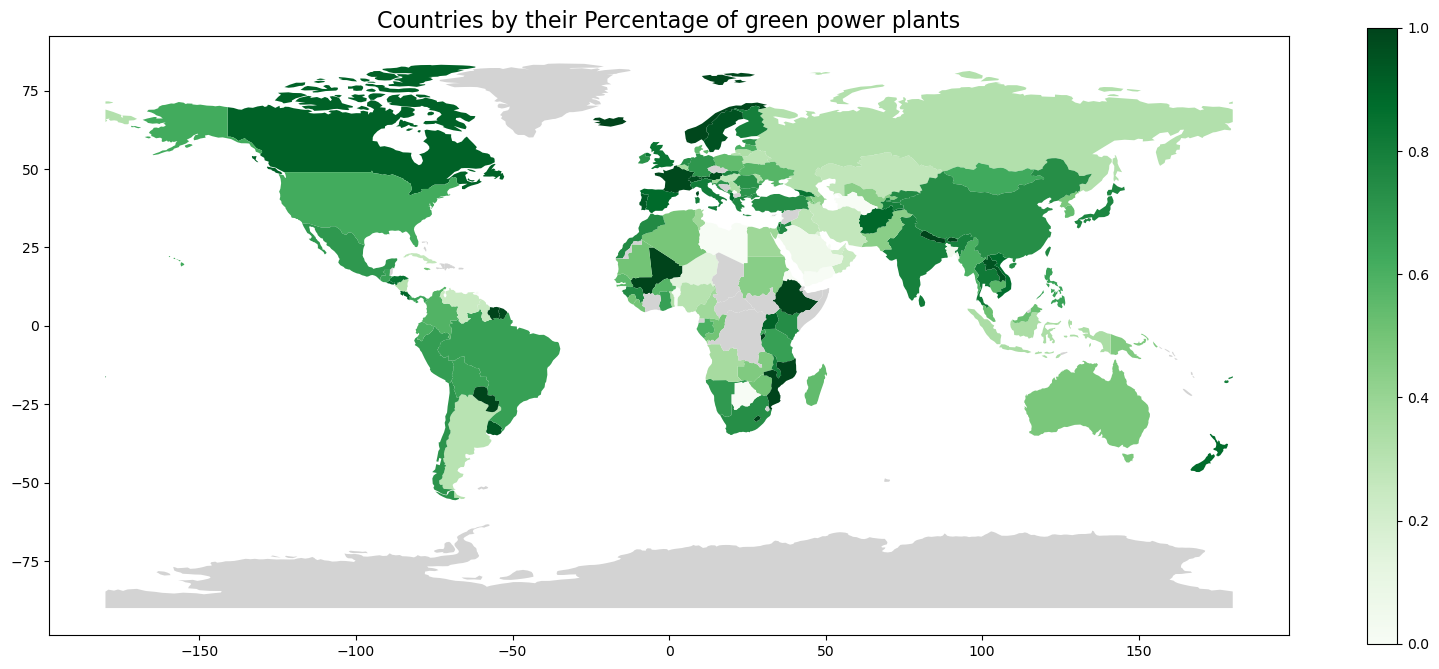

In [297]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['value'] = world['name'].map(greenness_dict)

fig, ax = plt.subplots(figsize=(20, 8))
world.plot(column='value', cmap='Greens', legend=True, ax=ax, missing_kwds={
    "color": "lightgrey",  
    "label": "No Data"
}) 
ax.set_title('Countries by their Percentage of green power plants', fontsize=16)
plt.show()